In [1]:
%%capture
!pip install lifelines

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, chi2_contingency
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# **Exploratory Data Analysis of Non-Alcoholic Fatty Liver Disease:**

In [3]:
# Load the nafld1 file
nafld1_data = pd.read_csv('/kaggle/input/non-alcohol-fatty-liver-disease/nafld1.csv')

# Data exploration
print("Statistiques descriptives :")
print(nafld1_data.describe())

Statistiques descriptives :
         Unnamed: 0            id           age          male        weight  \
count  17549.000000  17549.000000  17549.000000  17549.000000  12763.000000   
mean    8780.106046   8784.215967     52.659639      0.467320     86.353350   
std     5070.539328   5070.970712     14.722515      0.498945     22.239458   
min        1.000000      1.000000     18.000000      0.000000     33.400000   
25%     4389.000000   4393.000000     42.000000      0.000000     70.000000   
50%     8778.000000   8786.000000     53.000000      0.000000     83.900000   
75%    13171.000000  13175.000000     63.000000      1.000000     99.200000   
max    17566.000000  17566.000000     98.000000      1.000000    181.700000   

             height           bmi       case.id        futime        status  
count  14381.000000  12588.000000  17518.000000  17549.000000  17549.000000  
mean     169.434949     30.073865   8840.924478   2410.600547      0.077725  
std       10.141421      7

**Distribution of Age in Non-Alcoholic Fatty Liver Disease Data :**

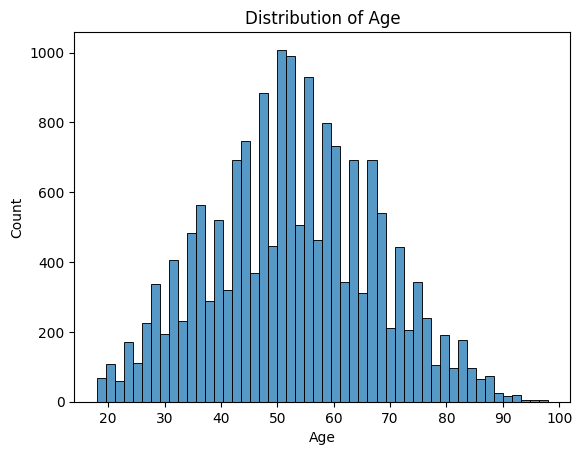

In [4]:
sns.histplot(nafld1_data['age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

**Comparison of BMI by Gender in Non-Alcoholic Fatty Liver Disease Data :**

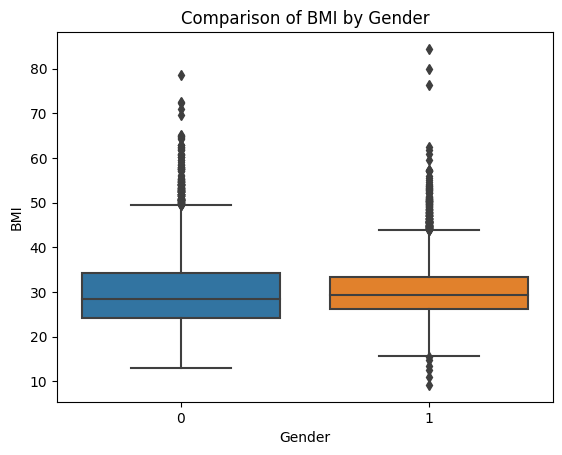

In [5]:
sns.boxplot(x='male', y='bmi', data=nafld1_data)
plt.xlabel('Gender')
plt.ylabel('BMI')
plt.title('Comparison of BMI by Gender')
plt.show()

**Comparison of features between NAFLD and control groups :**

In [6]:
nafld_group = nafld1_data[nafld1_data['case.id'] == 1]
control_group = nafld1_data[nafld1_data['case.id'] == 0]

t_stat, p_value = ttest_ind(nafld_group['weight'], control_group['weight'])
print("T-Test - Weight: t-statistic = {:.2f}, p-value = {:.4f}".format(t_stat, p_value))

chi2_stat, p_value, _, _ = chi2_contingency(pd.crosstab(nafld1_data['male'], nafld1_data['case.id']))
print("Chi-Square Test - Gender and NAFLD: chi2-statistic = {:.2f}, p-value = {:.4f}".format(chi2_stat, p_value))

T-Test - Weight: t-statistic = nan, p-value = nan
Chi-Square Test - Gender and NAFLD: chi2-statistic = 17518.00, p-value = 0.0000


**Survival Analysis :** Kaplan-Meier Survival Curve

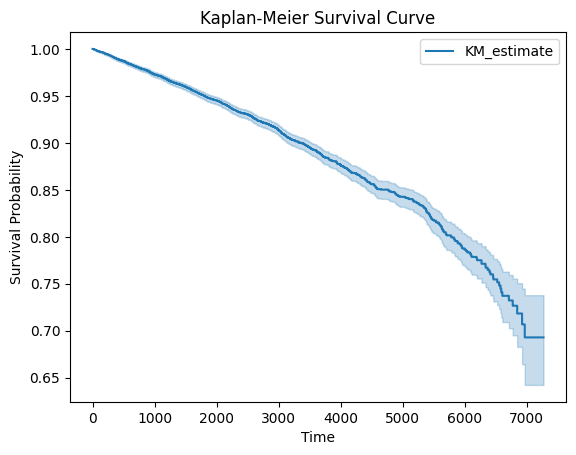

In [7]:
# Modélisation prédictive - Classification
# Utilisez les variables de votre choix pour créer les ensembles d'entraînement et de test,
# puis entraînez et évaluez votre modèle de classification.

# Analyse de survie
kmf = KaplanMeierFitter()
kmf.fit(nafld1_data['futime'], nafld1_data['status'])
kmf.plot_survival_function()
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.title('Kaplan-Meier Survival Curve')
plt.show()

**Cox Proportional Hazard Model :** Survival Analysis

In [8]:
# Remove rows containing missing values
nafld1_data = nafld1_data.dropna()

# Create an instance of the Cox proportional hazard regression model
cph = CoxPHFitter()

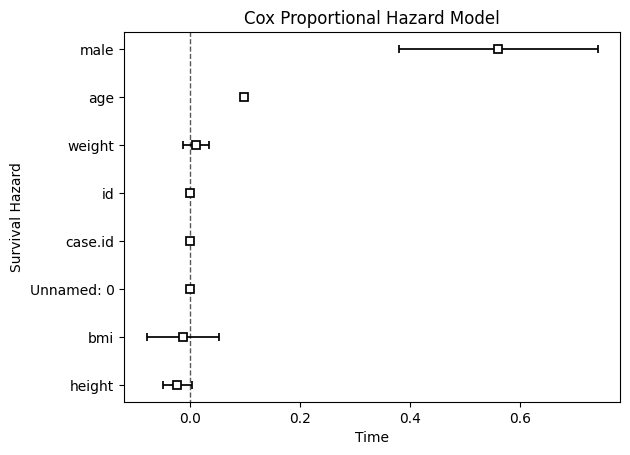

In [9]:
cph.fit(nafld1_data, duration_col='futime', event_col='status')
cph.plot()
plt.xlabel('Time')
plt.ylabel('Survival Hazard')
plt.title('Cox Proportional Hazard Model')
plt.show()

**Correlation Analysis :**

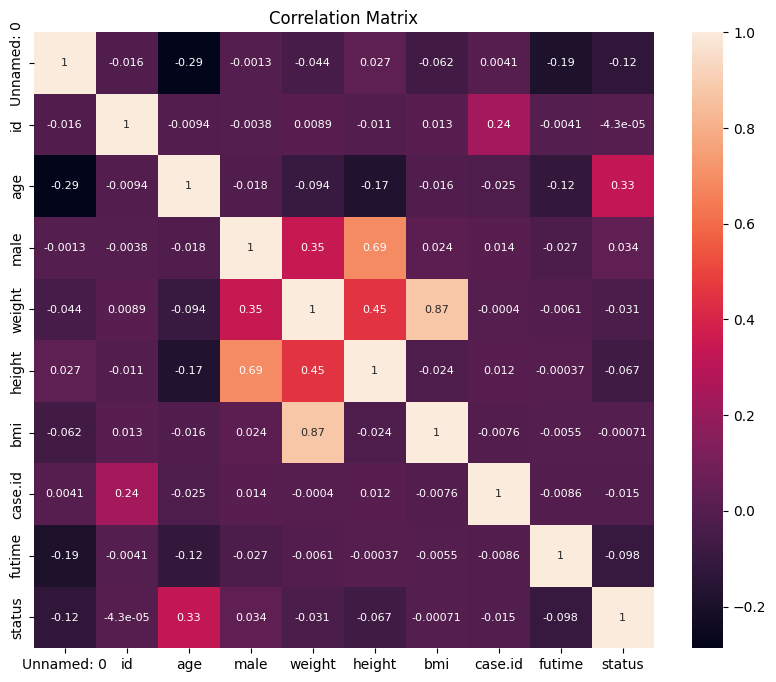

In [10]:
correlation_matrix = nafld1_data.corr()
plt.figure(figsize=(10, 8))  # Ajuster la taille de la heatmap
sns.heatmap(correlation_matrix, annot=True, annot_kws={"size": 8})  # Ajuster la taille des annotations
plt.title('Correlation Matrix')
plt.show()

# **Improved Random Forest Classifier for Non-Alcoholic Fatty Liver Disease Prediction:**

In [11]:
data = nafld1_data

**Splitting the Features (Independent Variables) and the Target Variable (Status)** :

In [12]:
X = data.drop(["id", "status", "bmi"], axis=1)
y = data["status"]

**Splitting the data into training and test sets :**

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

**Creating a pipeline for data preprocessing :**

In [14]:
pipeline = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler(),
    RandomForestClassifier(n_estimators=250)
)

**Train the model on the training data :**

In [15]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=250))])

**Making predictions on the test data :**

In [16]:
predictions = pipeline.predict(X_test)

**Calculating the Model Accuracy :**

# Confusion Matrix Visualization :
This code computes the confusion matrix based on the predicted and actual values of a classification model. It then plots the confusion matrix as a heatmap using matplotlib.pyplot and seaborn. The matrix provides insights into the model's performance by showing the counts of true positives, true negatives, false positives, and false negatives. The color-coded heatmap highlights the distribution of predictions, with darker shades indicating higher values. The title, x-axis, and y-axis labels provide additional context for interpreting the confusion matrix.

In [17]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, predictions)

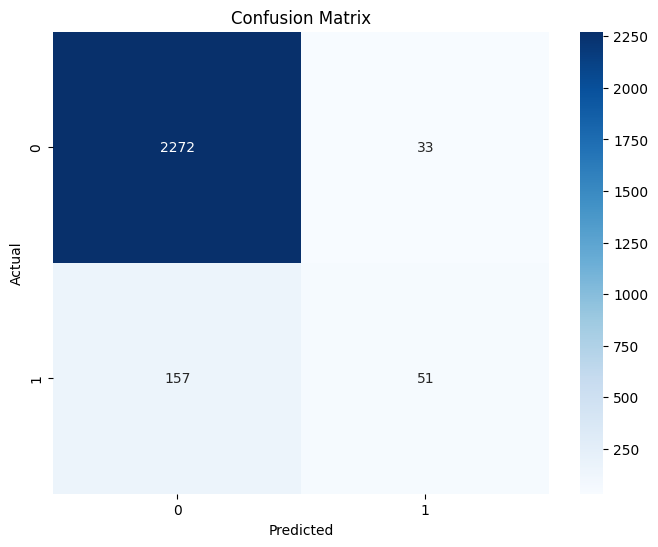

In [18]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Receiver Operating Characteristic (ROC) Curve Visualization :
This code generates and plots an ROC curve to evaluate the performance of a binary classification model. It uses predicted probabilities to compute the false positive rate, true positive rate, and thresholds. The resulting curve showcases the trade-off between true positive and false positive rates, with the AUC score representing overall performance.

In [19]:
# Get the predicted probabilities for each class
predicted_probabilities = pipeline.predict_proba(X_test)

In [20]:
# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, predicted_probabilities[:, 1])

In [21]:
# Compute the Area Under the Curve (AUC)
auc_score = auc(fpr, tpr)

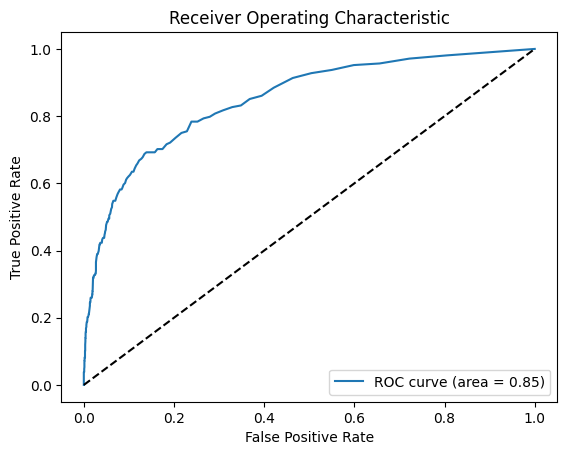

In [22]:
# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')  # Plot the random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()